In [13]:
%matplotlib notebook

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sys
from scipy.stats import linregress
import sys
from numpy.random import rand

In [15]:
life_expectancy  = "Resources/world.csv"
life_expectancy = pd.read_csv(life_expectancy)
life_expectancy.head()

,Country,Coastline,Infant mortality (per 1000 births),GDP ($ per capita),Arable,Crops,Climate,Birthrate,Deathrate,Agriculture
0,Afghanistan,"0,00","163,07",700.0,"12,13","0,22",1,"46,6","20,34","0,38"
1,Albania,"1,26","21,52",4500.0,"21,09","4,42",3,"15,11","5,22","0,232"
2,Algeria,"0,04",31,6000.0,"3,22","0,25",1,"17,14","4,61","0,101"
3,American Samoa,"58,29","9,27",8000.0,10,15,2,"22,46","3,27",NaN
4,Andorra,"0,00","4,05",19000.0,"2,22",0,3,"8,71","6,25",NaN


In [16]:
life_expectancy.dtypes


Country                                object
Coastline                              object
Infant mortality (per 1000 births)     object
GDP ($ per capita)                    float64
Arable                                 object
Crops                                  object
Climate                                object
Birthrate                              object
Deathrate                              object
Agriculture                            object
dtype: object

In [17]:
life_expectancy['Infant mortality (per 1000 births)'] = life_expectancy['Infant mortality (per 1000 births)'].replace({",":"."},regex=True).apply(pd.to_numeric,1)
life_expectancy['Birthrate'] = life_expectancy['Birthrate'].replace({",":"."},regex=True).apply(pd.to_numeric,1)
life_expectancy['Deathrate'] = life_expectancy['Deathrate'].replace({",":"."},regex=True).apply(pd.to_numeric,1)
life_expectancy['Crops '] = life_expectancy['Crops '].replace({",":"."},regex=True).apply(pd.to_numeric,1)
life_expectancy['Arable '] = life_expectancy['Arable '].replace({",":"."},regex=True).apply(pd.to_numeric,1)
life_expectancy['Coastline '] = life_expectancy['Coastline '].replace({",":"."},regex=True).apply(pd.to_numeric,1)

In [18]:
life_expectancy_2016 = life_expectancy[['Birthrate', 'Deathrate', 'Country','Infant mortality (per 1000 births)', 'Crops ','Coastline ']]
life_expectancy_2016.dropna()

,Birthrate,Deathrate,Country,Infant mortality (per 1000 births),Crops,Coastline
0,46.60,20.34,Afghanistan,163.07,0.22,0.00
1,15.11,5.22,Albania,21.52,4.42,1.26
2,17.14,4.61,Algeria,31.00,0.25,0.04
3,22.46,3.27,American Samoa,9.27,15.00,58.29
4,8.71,6.25,Andorra,4.05,0.00,0.00
5,45.11,24.20,Angola,191.19,0.24,0.13
6,14.17,5.34,Anguilla,21.03,0.00,59.80
7,16.93,5.37,Antigua & Barbuda,19.46,4.55,34.54
8,16.73,7.55,Argentina,15.18,0.48,0.18
9,12.07,8.23,Armenia,23.28,2.30,0.00


In [19]:
life_expectancy_pt = life_expectancy_2016[['Deathrate', 'Birthrate','Country']]
life_expectancy_pt.sort_values(by='Birthrate', ascending=False)

,Deathrate,Birthrate,Country
151,20.91,50.73,Niger
128,16.89,49.82,Mali
210,12.24,47.35,Uganda
0,20.34,46.60,Afghanistan
183,23.03,45.76,Sierra Leone
40,16.38,45.73,Chad
31,15.60,45.62,Burkina Faso
188,16.63,45.13,Somalia
5,24.20,45.11,Angola
117,23.10,44.77,Liberia


In [20]:
life_expectancy_dt = life_expectancy_pt.set_index('Country').sort_values(by='Birthrate', ascending=False)
life_expectancy_dt.dropna()

,Deathrate,Birthrate
Country,,
Niger,20.91,50.73
Mali,16.89,49.82
Uganda,12.24,47.35
Afghanistan,20.34,46.60
Sierra Leone,23.03,45.76
Chad,16.38,45.73
Burkina Faso,15.60,45.62
Somalia,16.63,45.13
Angola,24.20,45.11


In [21]:
x_axis = np.array('Birthrate')
y = np.array(['Country'])

<IPython.core.display.Javascript object>


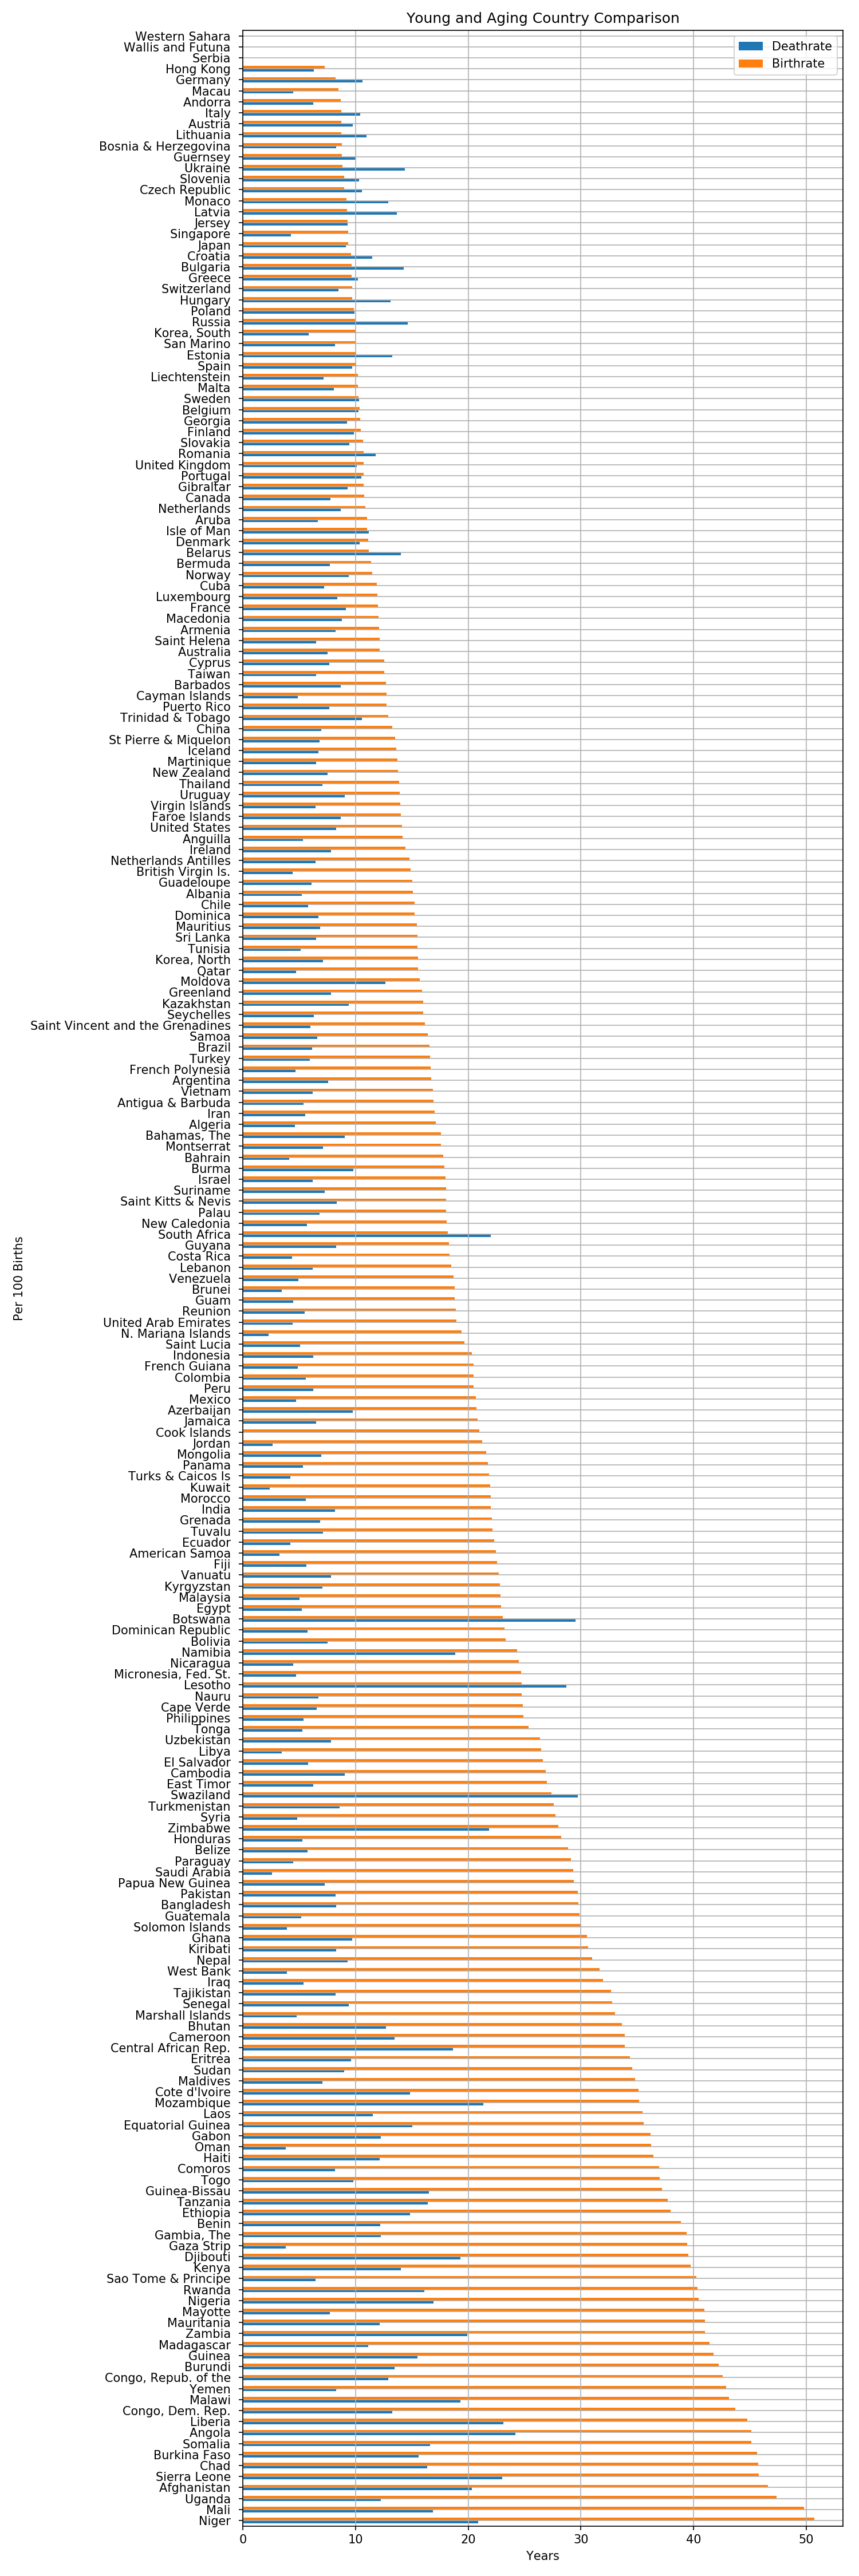

In [22]:
life_expectancy_dt.plot(kind="barh", figsize=(10,30))
plt.title("Young and Aging Country Comparison")
plt.xlabel("Years")
plt.ylabel("Per 100 Births")
plt.grid()

plt.show()
plt.tight_layout()

plt.savefig("Resources/country.png")
plt.show()

In [23]:
life_expectancy_crop = life_expectancy[['Coastline ','Country','Birthrate']]
life_expectancy_crop.head()

,Coastline,Country,Birthrate
0,0.00,Afghanistan,46.60
1,1.26,Albania,15.11
2,0.04,Algeria,17.14
3,58.29,American Samoa,22.46
4,0.00,Andorra,8.71


In [30]:
coast = life_expectancy[['Coastline ', 'Birthrate','Country']]

coast.set_index('Country')
coast.head()

,Coastline,Birthrate,Country
0,0.00,46.60,Afghanistan
1,1.26,15.11,Albania
2,0.04,17.14,Algeria
3,58.29,22.46,American Samoa
4,0.00,8.71,Andorra


In [31]:
coast_dt = coast.set_index('Country').sort_values(by='Birthrate', ascending=False)
coast_dt.dropna()
coast.head()

,Coastline,Birthrate,Country
0,0.00,46.60,Afghanistan
1,1.26,15.11,Albania
2,0.04,17.14,Algeria
3,58.29,22.46,American Samoa
4,0.00,8.71,Andorra


<IPython.core.display.Javascript object>


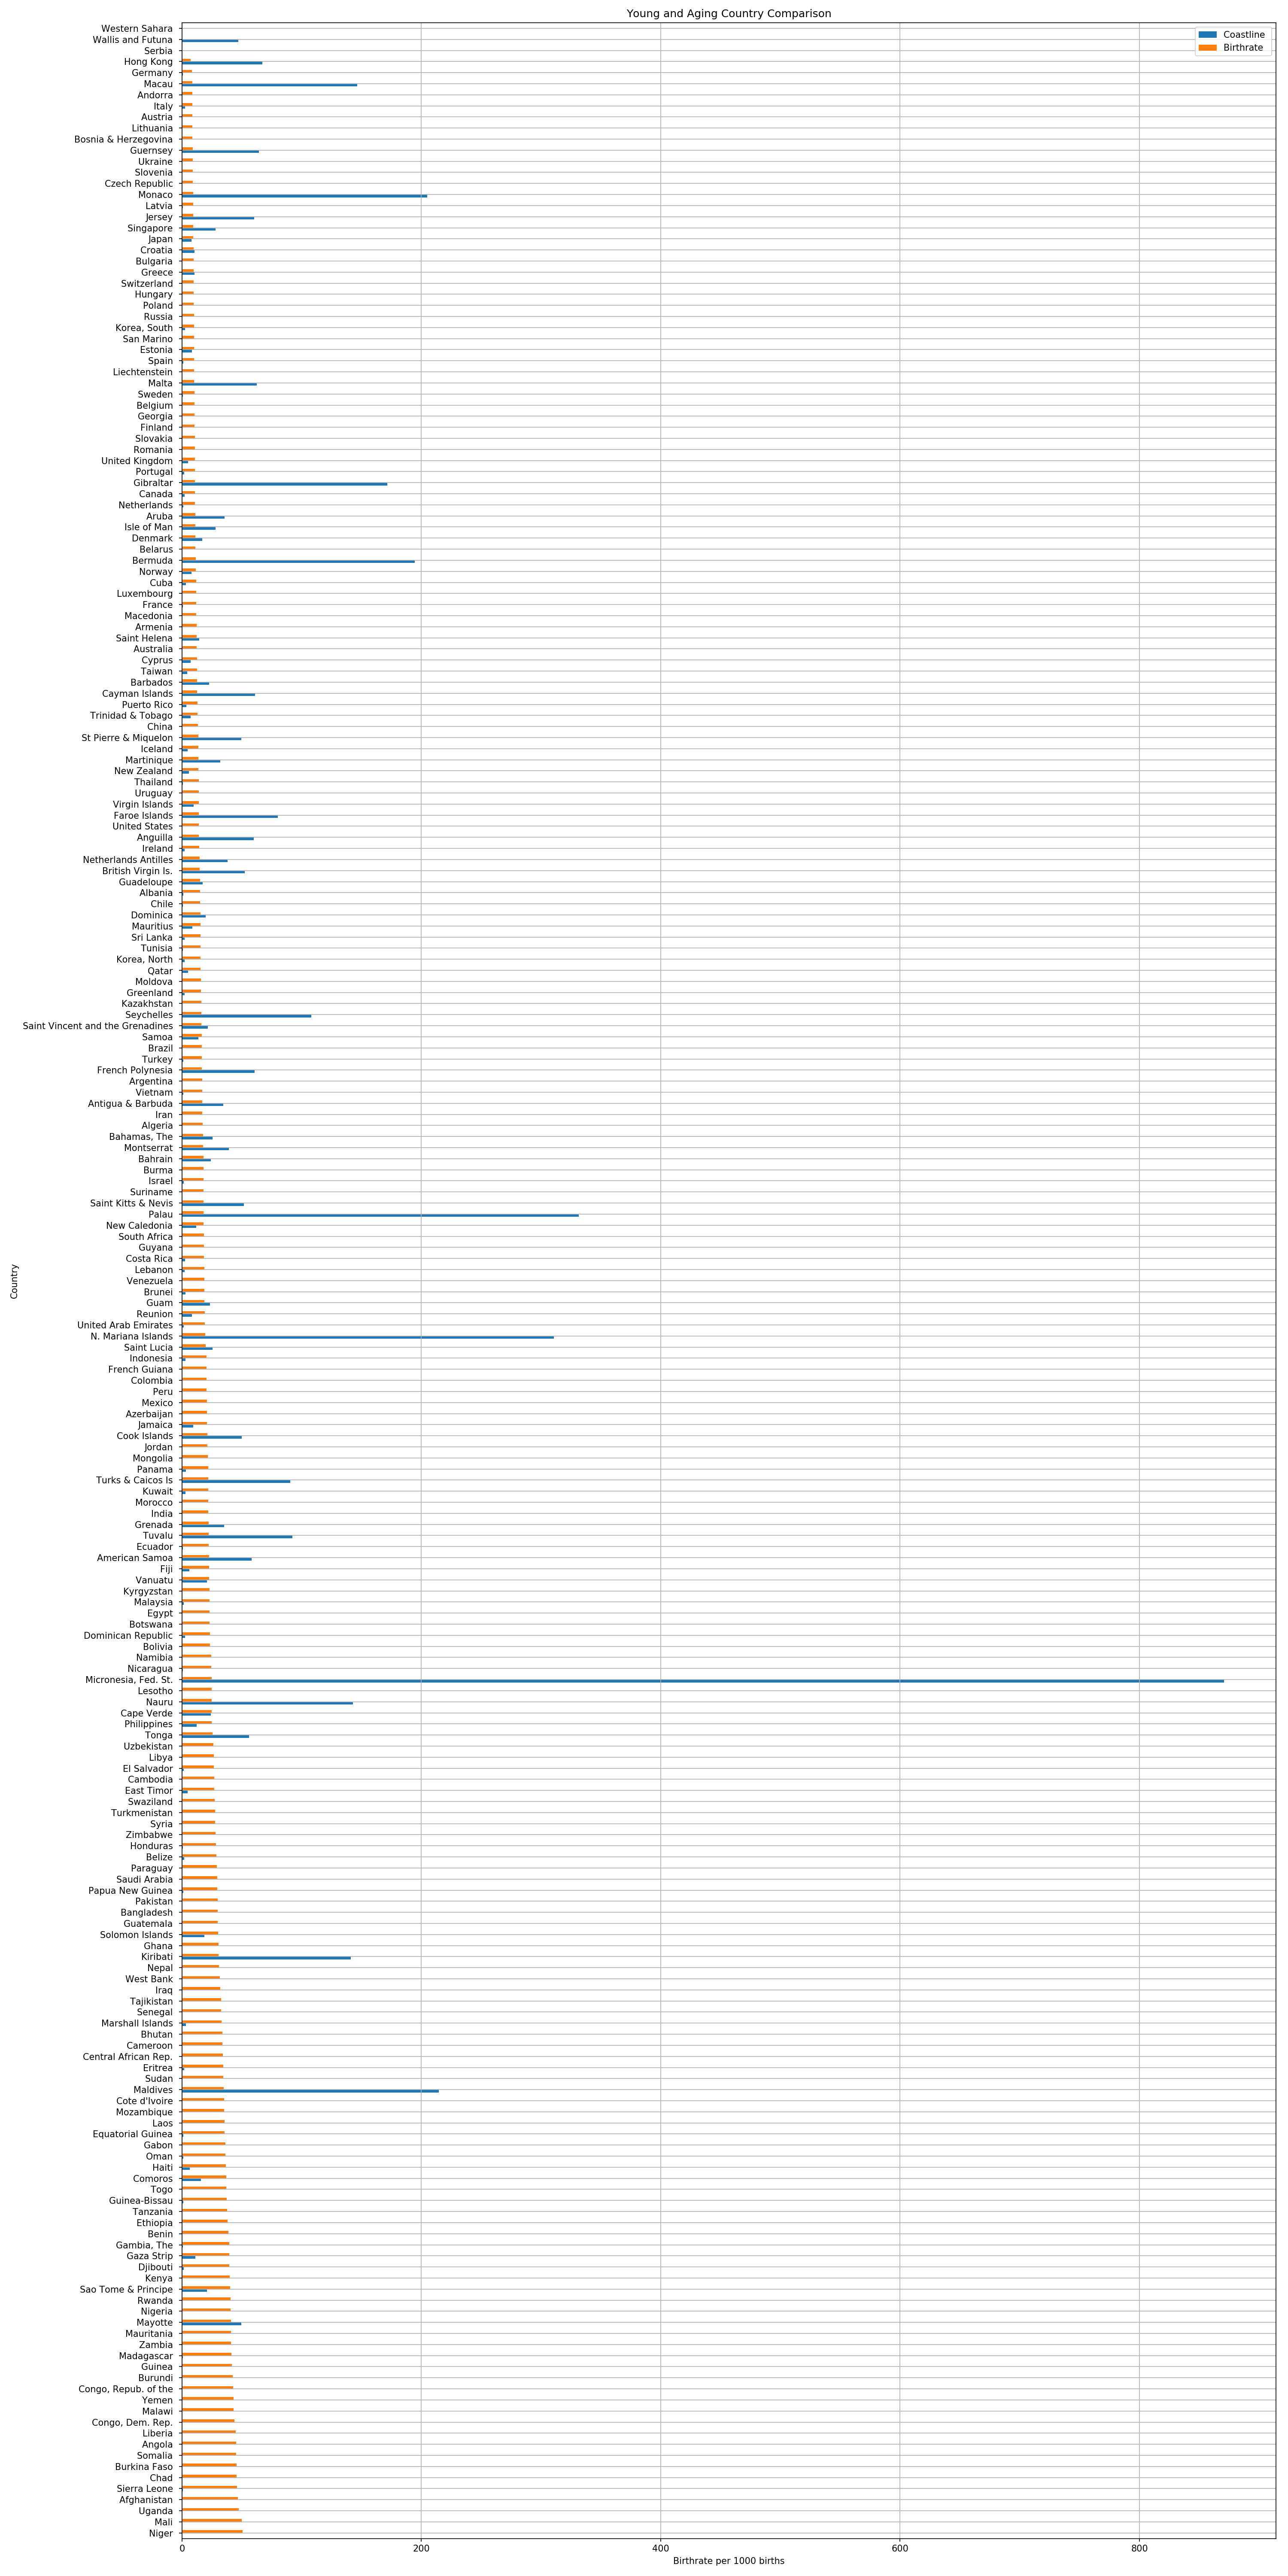

In [36]:
coast_dt.plot(kind="barh", figsize=(20,40))
plt.title("Young and Aging Country Comparison")
plt.xlabel("Birthrate per 1000 births")
plt.ylabel("Country")
plt.grid()

plt.show()
plt.tight_layout()